In [2]:
# Step 1:  libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.datasets import fashion_mnist


Training set shape: (60000, 28, 28)
Testing set shape: (10000, 28, 28)


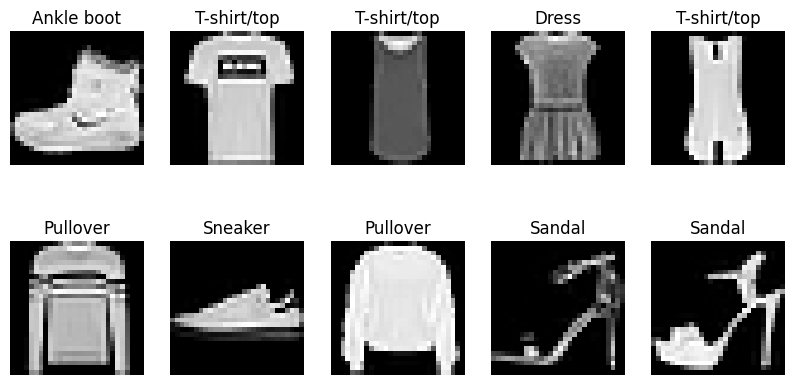

In [3]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()

x_train_flat = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flat  = x_test.reshape(x_test.shape[0], -1) / 255.0

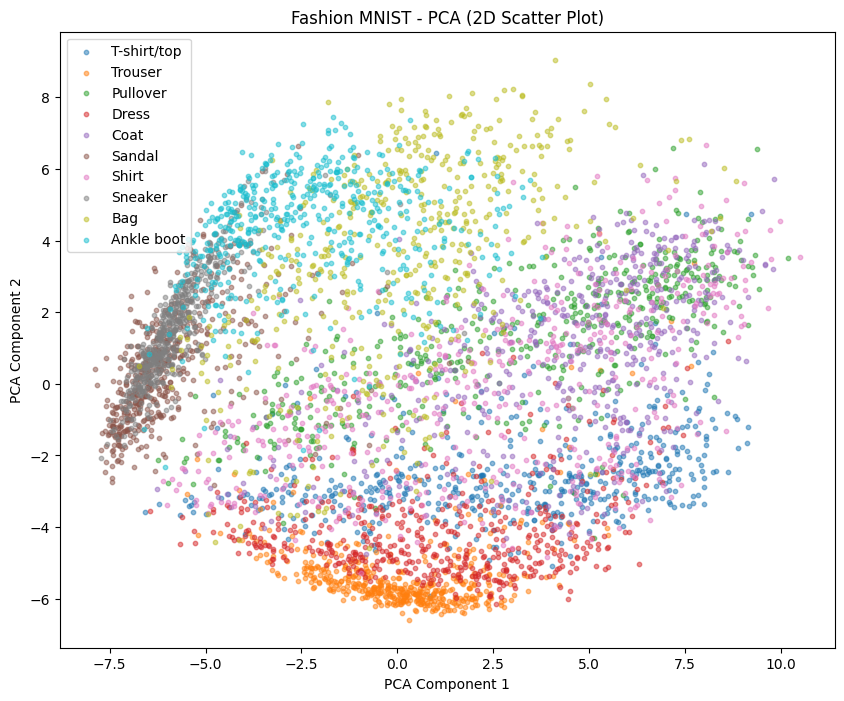

In [8]:
pca_2d = PCA(n_components=2)
x_train_2d = pca_2d.fit_transform(x_train_flat)

plt.figure(figsize=(10,8))
for i in range(10):
    idx = np.where(y_train == i)[0][:500]  # 500 samples per class
    plt.scatter(x_train_2d[idx, 0], x_train_2d[idx, 1], 
                label=class_names[i], alpha=0.5, s=10)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Fashion MNIST - PCA (2D Scatter Plot)")
plt.legend()
plt.show()

In [9]:
pca_model = PCA(n_components=100)
x_train_pca = pca_model.fit_transform(x_train_flat)
x_test_pca = pca_model.transform(x_test_flat)


In [10]:


# SVM
print("\nTraining SVM...")
svm_model = SVC(kernel="rbf", gamma="scale")
svm_model.fit(x_train_pca, y_train)
y_pred_svm = svm_model.predict(x_test_pca)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm)

# Random Forest
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_pca, y_train)
y_pred_rf = rf_model.predict(x_test_pca)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)

# Neural Network
print("\nTraining Neural Network...")
mlp_model = MLPClassifier(hidden_layer_sizes=(128,64), max_iter=10, alpha=1e-4,
                          solver='adam', random_state=42, verbose=False)
mlp_model.fit(x_train_pca, y_train)
y_pred_mlp = mlp_model.predict(x_test_pca)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print("Neural Network Accuracy:", acc_mlp)



Training SVM...
SVM Accuracy: 0.8847

Training Random Forest...
Random Forest Accuracy: 0.8602

Training Neural Network...
Neural Network Accuracy: 0.8861


/opt/anaconda3/envs/tf-mac/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


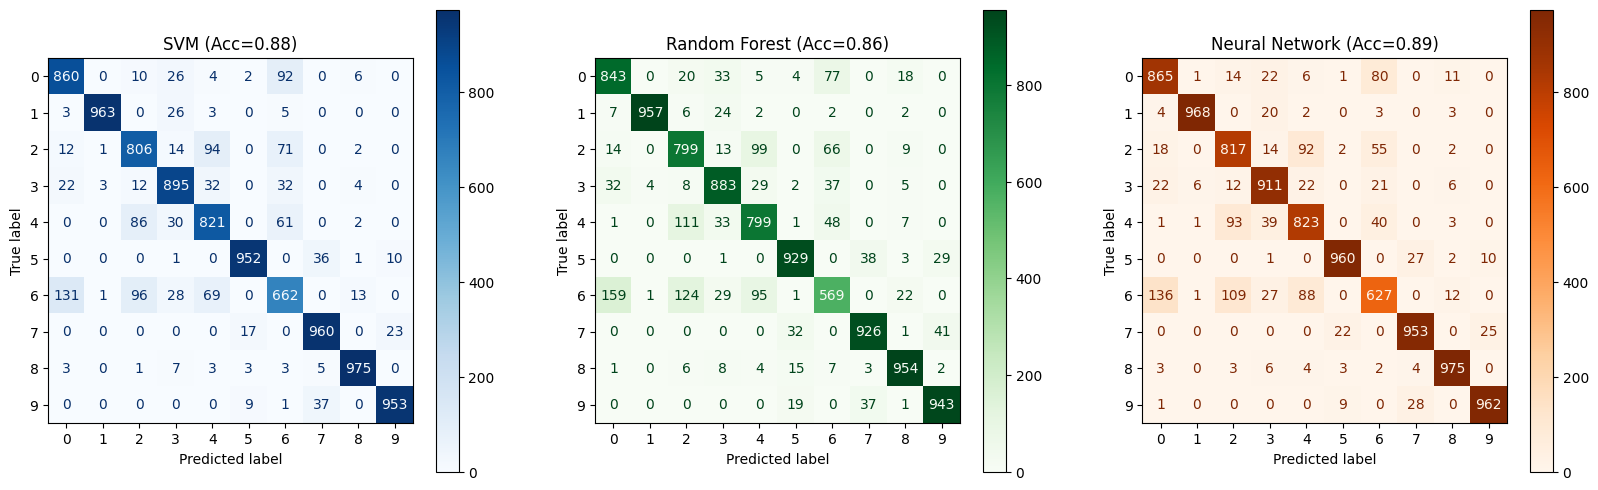

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, ax=axes[0], cmap="Blues")
axes[0].set_title(f"SVM (Acc={acc_svm:.2f})")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1], cmap="Greens")
axes[1].set_title(f"Random Forest (Acc={acc_rf:.2f})")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp, ax=axes[2], cmap="Oranges")
axes[2].set_title(f"Neural Network (Acc={acc_mlp:.2f})")

plt.show()




In [12]:
best_model = max([("SVM", acc_svm), ("Random Forest", acc_rf), ("Neural Net", acc_mlp)], key=lambda x: x[1])
print("\nBest Model:", best_model[0], "with Accuracy:", best_model[1])


Best Model: Neural Net with Accuracy: 0.8861
